# Batch Normalization: Emotion Detection 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
train_dataset = h5py.File('train_happy.h5', "r")
x_train = np.array(train_dataset["train_set_x"][:]) 
y_train = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_happy.h5', "r")
x_test = np.array(test_dataset["test_set_x"][:]) 
y_test = np.array(test_dataset["test_set_y"][:])

In [3]:
X_train = x_train
Y_train = np.reshape(y_train,(-1,1))

X_test = x_test
Y_test = np.reshape(y_test,(-1,1))

It's not happy!


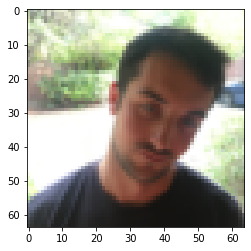

In [4]:
index = 0
plt.imshow(X_train[index,:,:,:])
print("It's{} happy!".format((1-y_train[index])*' not'))

It's happy!


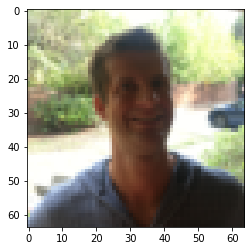

In [5]:
index = 1
plt.imshow(X_train[index,:,:,:])
print("It's{} happy!".format((1-y_train[index])*' not'))

In [6]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    x = tf.keras.Input(shape=dims[0])
    y = x
    y = tf.keras.layers.Lambda(lambda x: x/255.)(y)
    y = tf.keras.layers.ZeroPadding2D(padding=(3,3))(y)
    y = tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=(7,7), 
                               strides=(1,1), 
                               padding='valid', 
                               activation='linear', 
                               kernel_initializer='glorot_uniform', 
                               bias_initializer='zeros')(y)
    y = tf.keras.layers.BatchNormalization(axis=3)(y)
    y = tf.keras.layers.Activation(activation='relu')(y)
    y = tf.keras.layers.MaxPooling2D(pool_size=(2,2), 
                                     strides=None, 
                                     padding='valid')(y)
    y = tf.keras.layers.Flatten()(y)
    y = tf.keras.layers.Dense(units=dims[1], 
                              activation='sigmoid', 
                              kernel_initializer='glorot_uniform', 
                              bias_initializer='zeros')(y)
    model = tf.keras.Model(x, y)  
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer=optimizer)    
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [7]:
model = Model({'dims': [X_train.shape[1:], Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 40, 
               'learning_rate': 0.001,
               'batch_size': 16})

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0     

In [8]:
model.evaluate(X_train, Y_train)

600/600 [==============================] - 0s 580us/sample - loss: 0.3340 - binary_accuracy: 0.8983


[0.3339564887682597, 0.8983333]

In [9]:
model.evaluate(X_test, Y_test)

150/150 [==============================] - 0s 443us/sample - loss: 0.3714 - binary_accuracy: 0.8867


[0.37144721110661827, 0.88666666]

It's not happy!


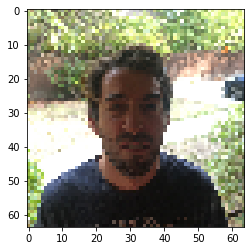

In [10]:
img = np.array(plt.imread("my_image.jpg"))
img_ = np.array(Image.fromarray(img).resize((64,64)))
plt.imshow(img_)
img__ = np.expand_dims(img_, axis=0)
print("It's{} happy!".format((1-(model.predict(img__)[0,0]>0.5).astype(int))*' not'))